In [1]:
# Load the Catchment data
from Reader import load_catchments
catchments = load_catchments('catchments_data.pkl')

In [2]:
catchment_indexes = [0,1,10,11,12,13,14,16,23,24]
# for ci in catchment_indexes:
#     catchments[ci].plot_yearly_data(data_type='precipitation', average_over_all_years=True)  # Plotting precipitation 

In [3]:
# for ci in catchment_indexes:
#     catchments[ci].plot_max_values_each_year('total_streamflow')  # Plotting the maximum precipitation value for each year

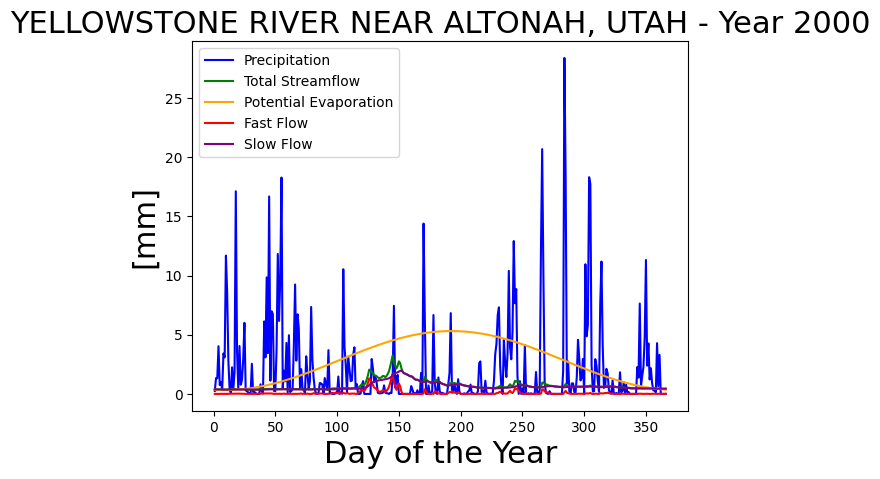

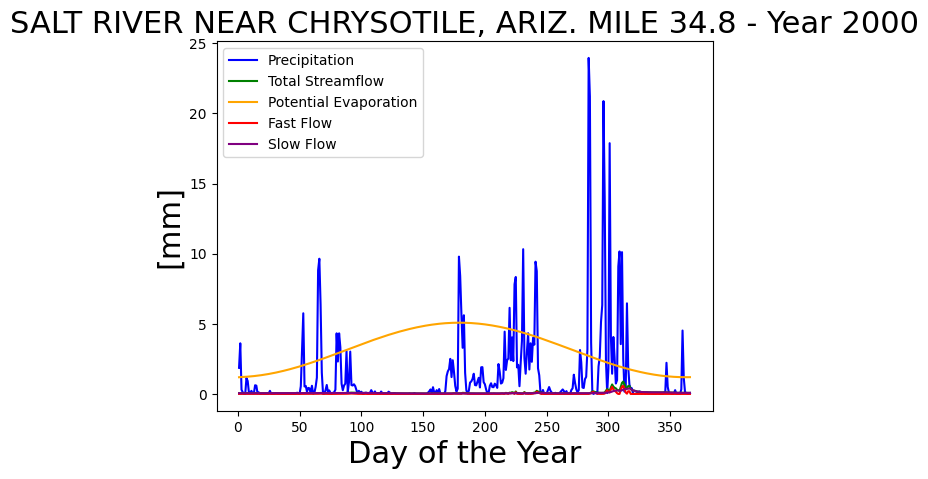

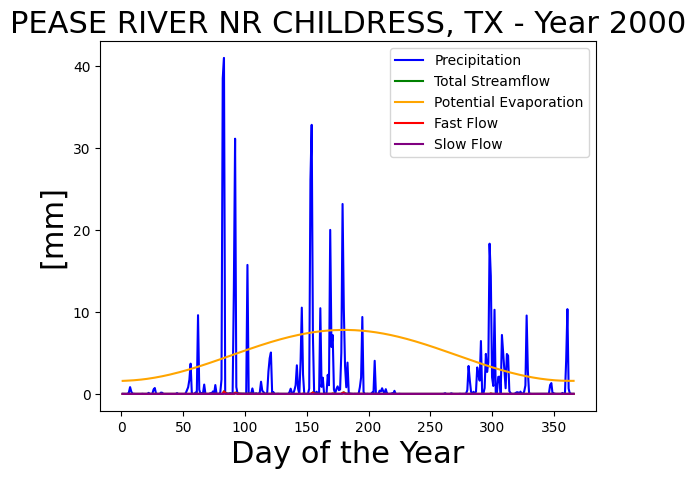

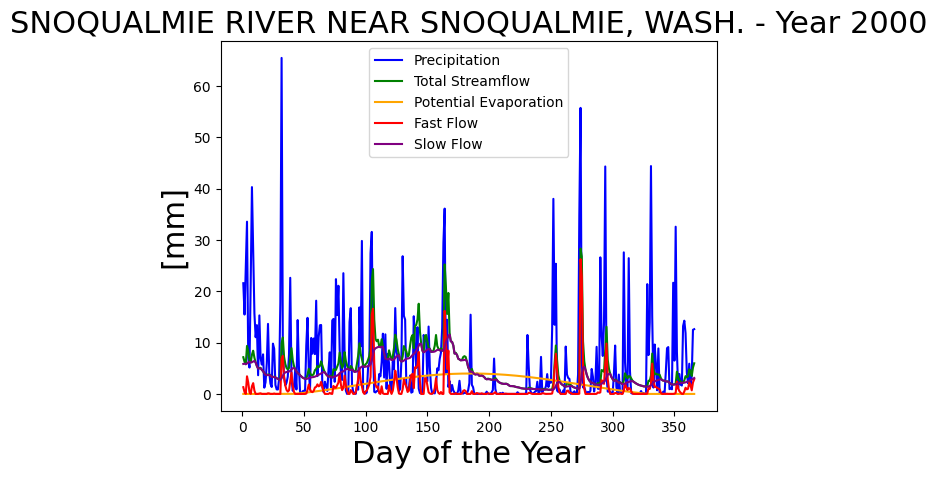

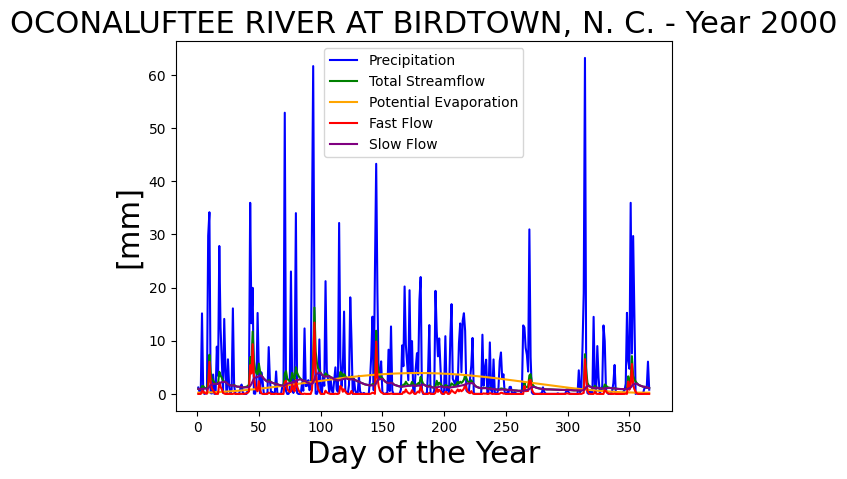

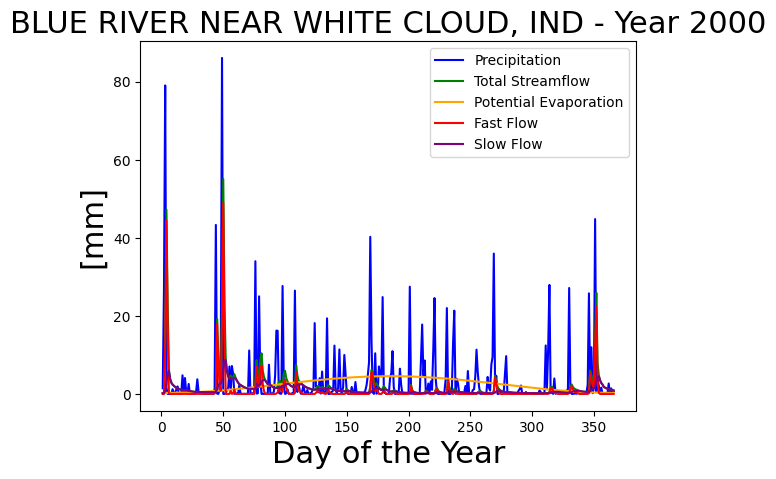

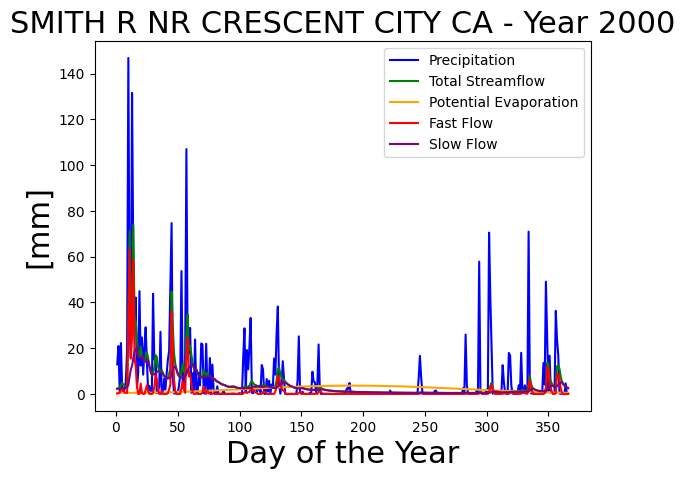

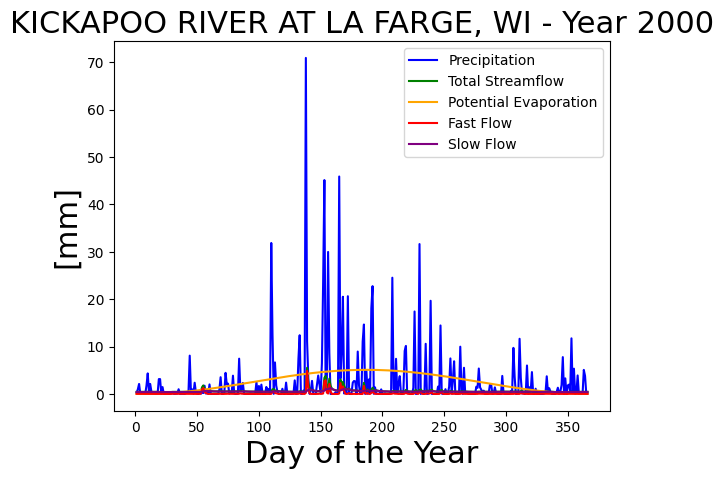

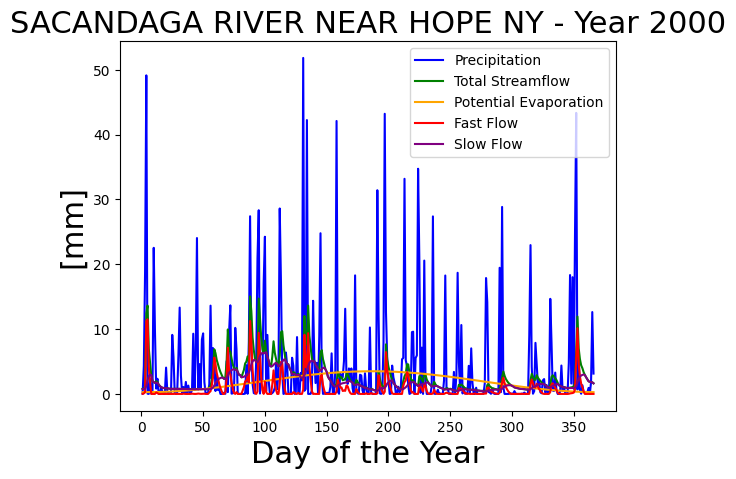

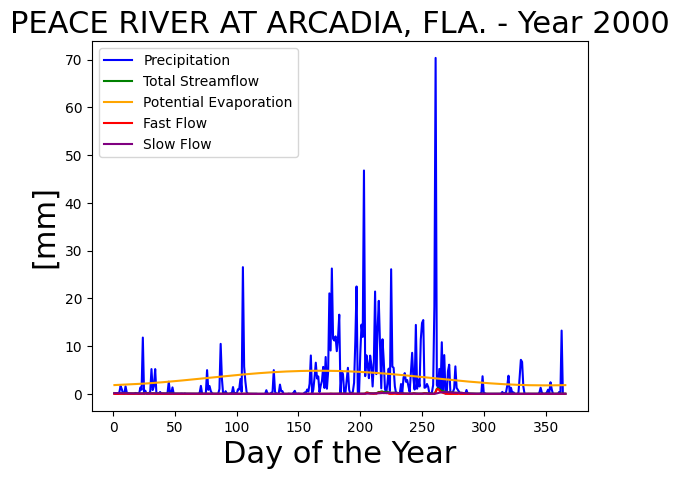

In [4]:
for ci in catchment_indexes:
    catchments[ci].plot_yearly_data(year = 2000, data_type='combination')  # Plotting the maximum precipitation value for each year


[640.0400000000001, 868.9499999999999, 325.44000000000005, 788.06, 513.9700000000003, 606.1100000000002, 880.0200000000007, 571.15, 895.2799999999999, 733.2299999999998, 943.5699999999999, 1140.1200000000008, 817.1200000000005, 747.5799999999995, 975.6899999999995, 917.6499999999997, 563.8199999999993, 642.1099999999999, 751.9699999999998, 802.3499999999999, 630.4300000000002, 761.6100000000001, 790.1800000000003, 925.41, 875.4300000000003, 873.3299999999998, 878.5899999999992, 802.8300000000005]


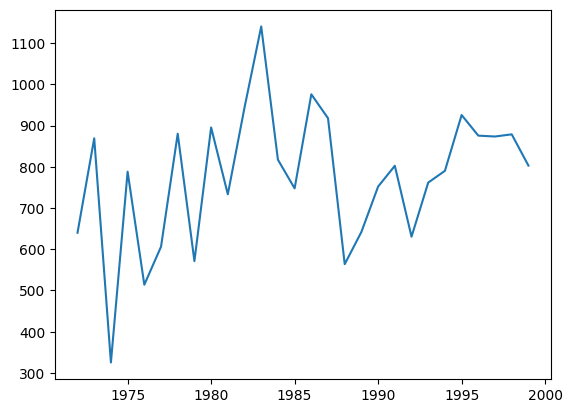

In [10]:
import matplotlib.pyplot as plt
catchment = catchments[0]
year = 1990
#Plotting for a specific year
data_values = []
sum_of_precip = []


for year in range(1972, 2000):
    daily_rain_sum = 0
    for water_day in catchment.water_data:
        if water_day.date.year == year:
            daily_rain_sum = daily_rain_sum + water_day.precipitation

    sum_of_precip.append(daily_rain_sum)

plt.plot(range(1972, 2000),sum_of_precip)
print(sum_of_precip)